# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# %matplotlib notebook

In [2]:
df = pd.read_csv('dados.csv')

In [3]:
df1 = df.copy()

In [4]:
df1.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
# Categorizar a variável APGAR5
df1['categorias_APGAR5'] = pd.cut(df1['APGAR5']
                       , bins = [0, 3, 5, 7, 10]
                       , labels = ['asfixia grave'
                                   , 'asfixia moderada'
                                   , 'asfixia leve'
                                   , 'normal']
                       , right = True
                      )

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

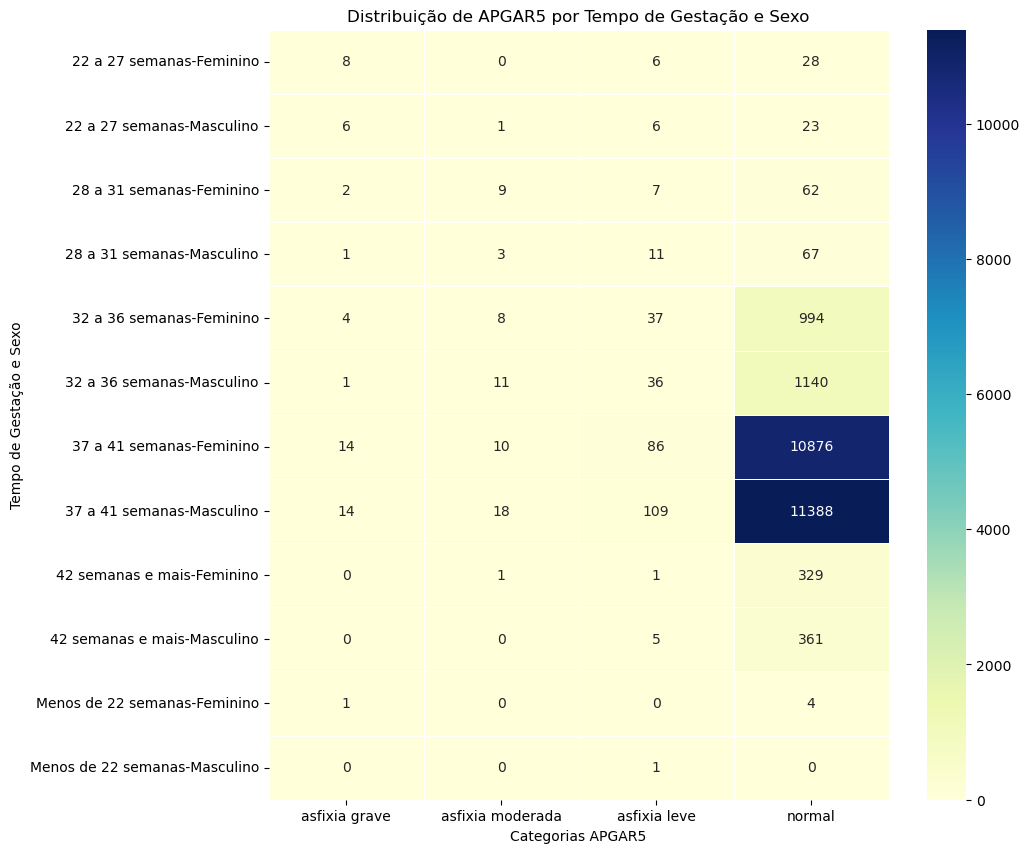

In [6]:
# Para criar esse gráfico de distribuição, achei melhor construir uma tabela de contigência 
# que juntasse o tempo de gestação com o sexo do recém-nascido para contar quantas ocorrên-
# cias há para cada categoria de APGAR5.

# Criando a tabela de contingência com GESTACAO, categorias_APGAR5 e SEXO
contagem_sexo = pd.crosstab([df1['GESTACAO'], df1['SEXO']], df1['categorias_APGAR5'])

# Para melhor visualização do gráfico, fiz esse ajuste do tamanho para 10 polegas para sua 
# largura e altura 
plt.figure(figsize=(10, 10))

# Para melhor visualização do gráfico, escolhi que este tivesse o formato de mapa de calor, 
# o que nos dá uma visão mais detalhada da contagem dos casos por meio das cores que são 
# mostradas pelo gráfico.
sns.heatmap(data = contagem_sexo
            # Estamos usando como DataFrame a tabela de contingência criada a partir da jun-
            # ção das variáveis de tempo de gestação ('GESTACAO') e sexo ('SEXO')em uma só e
            # contando as ocorrências das categorias de APGAR5.
            , annot=True
            # Mostra a contagem de cada ocorrência em sua respectiva célula no mapa de calor
            # e a insere no gráfico para uma melhor visualização.
            , fmt="d"
            # Especifica que os valores contidos no gráfico são do formato de números intei-
            # ros
            , cmap="YlGnBu"
            # Esta linha de código especifica a escala de cor de acordo com a densidade de
            # contagem para cada variável, desde a densidade mais baixa, amarela - Yl, pas-
            # sando pela verde - Gn e, finalizando na mais alta, azul - Bu. Esta escala é
            # mostrada no lado direito do mapa de calor.
            , linewidths=.5
            # A linha acima especifica a largura da linha que separa cada célula do mapa de
            # calor
           )

plt.title('Distribuição de APGAR5 por Tempo de Gestação e Sexo')
# A linha acima é responsável por colocar o título no gráfico 

plt.xlabel('Categorias APGAR5')
# Esta linha coloca no eixo X o rótulo 'Categorias APGAR5'

plt.ylabel('Tempo de Gestação e Sexo')
# Esta linha coloca no eixo Y o rótulo 'Tempo de Gestação e Sexo'

plt.show()
# Esta linha posta o gráfico no notebook

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
contagem = pd.crosstab(index = df1['GESTACAO'], columns = df1['categorias_APGAR5'])

contagem

categorias_APGAR5,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,14,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,6,19,73,2134
37 a 41 semanas,28,28,196,22266
42 semanas e mais,0,1,6,690
Menos de 22 semanas,1,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
percentual_linha = contagem.div(contagem.sum(axis=1), axis=0) * 100

percentual_linha

categorias_APGAR5,asfixia grave,asfixia moderada,asfixia leve,normal
GESTACAO,,,,
22 a 27 semanas,17.948718,1.282051,15.384615,65.384615
28 a 31 semanas,1.851852,7.407407,11.111111,79.629630
32 a 36 semanas,0.268817,0.851254,3.270609,95.609319
37 a 41 semanas,0.124345,0.124345,0.870415,98.880895
42 semanas e mais,0.000000,0.143472,0.860832,98.995696
Menos de 22 semanas,16.666667,0.000000,16.666667,66.666667


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Figure size 1400x800 with 0 Axes>

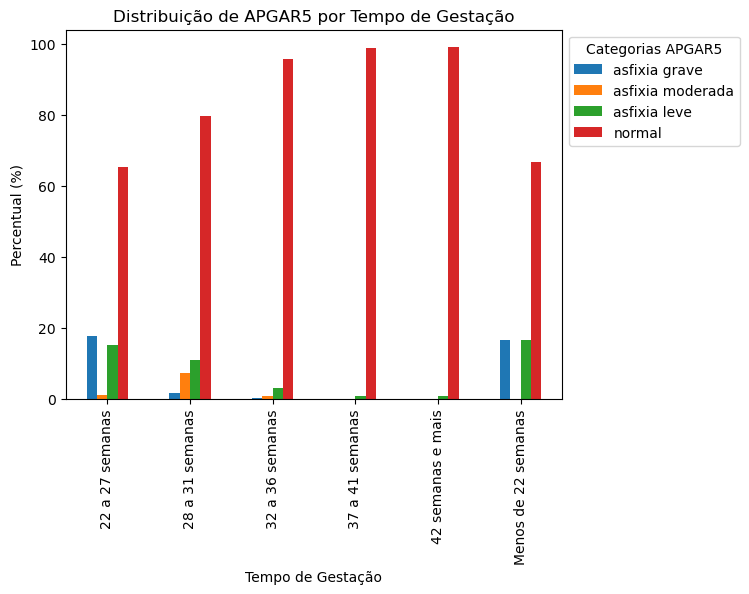

In [9]:
# Para melhor visualização do gráfico, fiz esse ajuste do tamanho para 14 polegas para sua 
# largura e 8 polegadas para a sua altura 
plt.figure(figsize = (14, 8))

# Plotando o gráfico de barras com a tabela percentual
ax = percentual_linha.plot.bar()

# Posicionando a legenda fora do gráfico
plt.legend(title = 'Categorias APGAR5'
           # A linha acima coloca como título da caixa de legenda como 'Categorias APGAR5'
           , bbox_to_anchor = (1, 1)
           # Define a posição da caixa de legenda fora do gráfico e à direita.
           , loc = 'upper left'
           # A posição da caixa da legenda é no alto e à esquerda.
          )

# Definimos o título do gráfico como 'Distribuição de APGAR5 por Tempo de Gestação'
plt.title('Distribuição de APGAR5 por Tempo de Gestação')

# O rótulo do eixo X é 'Tempo de Gestação'
plt.xlabel('Tempo de Gestação')

# O rótulo do eixo Y é 'Percentual (%)'
plt.ylabel('Percentual (%)')

# Exibindo o gráfico
plt.show()

### Então pela análise do gráfico, há uma maior ocorrência de asfixia leve e normal em bebês nascido em 37 semanas ou mais mostrando que o conjunto de dados corrobora com a afirmação dos médicos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

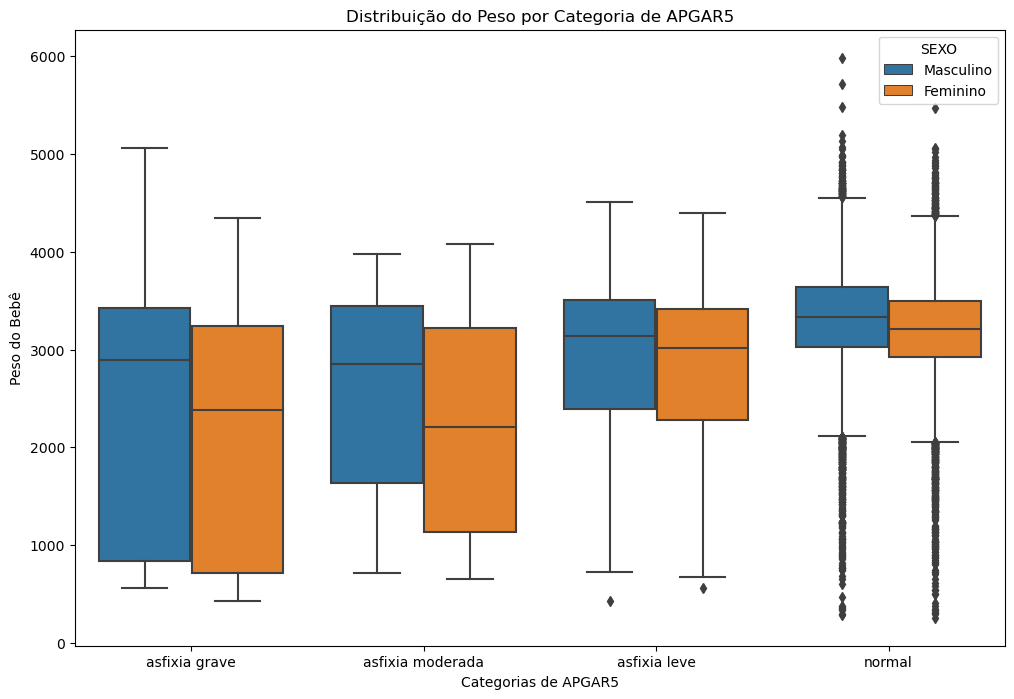

In [27]:
# Na minha opinião, o gráfico 'Boxplot' pode mostrar como se distribui é a distribuição das 
# categorias de APGAR5 pelo peso dos bebês. Também achei conveniente separar por sexo para 
# analizar se há alguma diferença na distribuição do peso de acordo com o gênero do recém-
# nascido.

# A linha abaixo determina o tamanho do gráfico
plt.figure(figsize=(12, 8))

# A seguir, determinamos que o gráfico será do tipo "Boxplot" e colocamos os parãmetros para 
# a construção do mesmo.
sns.boxplot(x = 'categorias_APGAR5'
            # No eixo x plotamos as categorias de APGAR5
            , y='PESO'
            # No eixo y plotamos os pesos das crianças
            , hue = 'SEXO'
            # Diferenciamos os 'Boxplots' de acordo com o sexo do recém-nascido
            , data=df1
            # Os dados usados são provenientes do DataFrame df1
           )

# Nas linhas abaixo, organizamos o título e os rótulos dos eixos do gráfico.
plt.title('Distribuição do Peso por Categoria de APGAR5')
# Acima definimos o título como: 'Distribuição do Peso por Categoria de APGAR5'
plt.xlabel('Categorias de APGAR5')
# Em seguida, nomeamos o eixo X de 'Categorias de APGAR5'
plt.ylabel('Peso do Bebê')
# Passamos a chamar o eixo Y de 'Peso do Bebê'
plt.show()
# E finalmente mostramos o gráfico para posterior análise

### Podemos perceber que quanto menor é o peso do bebê, maior é a change dele apresentar asfixia. Logo os bebês prematuros precisam de um cuidado maior. 
### Também pode-se perceber que os recém-nascidos do sexo feminino nascem com peso menor que os do sexo masculino.
### Pelo boxplot dos recém nascidos do sexo masculino, podemos perceber que a mediana de todas as categorias de APGAR5 estão próximas de 3000 gramas e, no sexo feminino é mais variado, situando-se entre 2000 e 3000 gramas.
### Além disso, na categoria 'asfixia grave', a quantidade de bebês masculinos com o peso abaixo da mediana é muito maior que a quantidade de bebês femininos, o que ocorre também na 'asfixia moderada', diminuindo na 'asfixia leve' e distribuindo igualmente na respiração 'normal'.
### Pesquisando sobre o desenvolvimento respiratório de recém-nascidos, podemos ver que há evidências de que este se dá de forma mais lenta em bebês do sexo masculino do que no feminino, o que leva a entender o porquê de o valor da mediana de todas as categorias de APGAR5 estão próximos, nos bebês do sexo masculino. 